Data Cleaning and Pre-processing

In [52]:
#Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [53]:
Startup_Data = pd.read_csv('/content/50_Startups.csv')

In [54]:
Startup_Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
Startup_Data.shape

(50, 5)

In [56]:
Startup_Data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Here, no null values to be handled

In [57]:
Startup_Data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<ipython-input-58-fdab94cb4159>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Startup_Data.Profit)


<Axes: xlabel='Profit', ylabel='Density'>

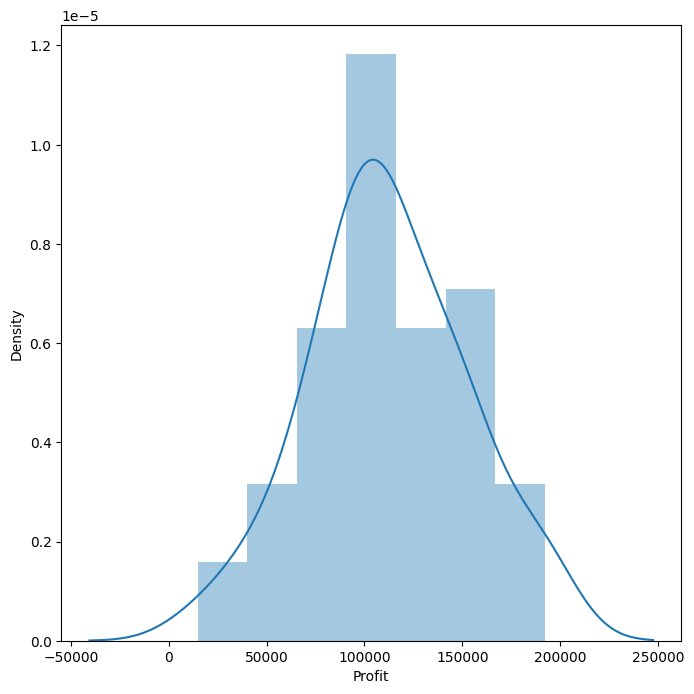

In [58]:
fig,ax = plt.subplots(figsize=(8,8))
sns.distplot(Startup_Data.Profit)

Here, there is a need to standardize the numerical data as the standard deviation is high

In [69]:
scaler = StandardScaler()
numerical_columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
numerical_data = Startup_Data[numerical_columns]                                #Extracting numerical data columns for Standardization
scaled_data = scaler.fit_transform(numerical_data)
type(scaled_data)

numpy.ndarray

In [83]:
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_features = scaled_df.drop(columns='Profit')
scaled_features['State'] = Startup_Data['State']
scaled_Startup_Data = pd.concat([scaled_features, scaled_df.drop(columns=['R&D Spend', 'Administration', 'Marketing Spend'])], axis=1)
type(scaled_Startup_Data)

pandas.core.frame.DataFrame

In [84]:
scaled_Startup_Data.head()              #final standardized data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,2.153943,New York,2.011203
1,1.955860,1.082807,1.923600,California,1.999430
2,1.754364,-0.728257,1.626528,Florida,1.980842
3,1.554784,-0.096365,1.422210,New York,1.776627
4,1.504937,-1.079919,1.281528,Florida,1.357740


Now, we divide the data into features and targets

In [85]:
X = scaled_Startup_Data.drop(columns='Profit')
Y = scaled_Startup_Data['Profit']

In [86]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.016411,0.560753,2.153943,New York
1,1.955860,1.082807,1.923600,California
2,1.754364,-0.728257,1.626528,Florida
3,1.554784,-0.096365,1.422210,New York
4,1.504937,-1.079919,1.281528,Florida


In [87]:
Y.head()

0    2.011203
1    1.999430
2    1.980842
3    1.776627
4    1.357740
Name: Profit, dtype: float64

Here, the categorical data is not the target columns and so OneHotEncoder is used for encoding it

In [91]:
encoder = OneHotEncoder(sparse=False)
state_df = X[['State']]
encoded_data = encoder.fit_transform(state_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [105]:
encoded_state_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(['State']))
encoded_X = pd.concat([X,encoded_state_df], axis=1)
X=encoded_X
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


Now, we split the features and target to training and testing datasets

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [107]:
X_train.shape

(40, 6)

In [108]:
X_test.shape

(10, 6)

In [109]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
36,-0.991570,0.205925,-0.081763,0.0,1.0,0.0
23,-0.136201,-0.562211,0.774349,0.0,1.0,0.0
37,-0.652532,-2.525994,-0.115608,1.0,0.0,0.0
18,0.396725,-0.258465,0.692992,0.0,1.0,0.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


In [110]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
12,0.443260,0.215449,0.320617,0.0,1.0,0.0
39,-0.773820,-1.383122,-0.297583,1.0,0.0,0.0
9,1.091819,-0.456640,0.776107,1.0,0.0,0.0
47,-1.622362,0.507722,-1.743127,1.0,0.0,0.0
31,-0.276958,1.130554,-1.014419,0.0,0.0,1.0


In [111]:
Y_train.shape

(40,)

In [112]:
Y_test.shape

(10,)

In [116]:
Final_Data = pd.concat([X,Y], axis=1)
Final_Data.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,2.016411,0.560753,2.153943,0.0,0.0,1.0,2.011203
1,1.955860,1.082807,1.923600,1.0,0.0,0.0,1.999430
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0,1.980842
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0,1.776627
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0,1.357740


In [117]:
Final_Data.to_csv('Final.csv')